In [ ]:
import sys
!{sys.executable} -m pip install -U kaleido

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import statsmodels.api as sm
import statsmodels.formula.api as smf

import pickle
import re

from selenium import webdriver
from selenium.webdriver.common.by import By
import json

import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter


import requests
from bs4 import BeautifulSoup


## 1. Data preprocessing and plots

**1.1** Import 'players_21.csv' as a pandas data dataframe. Define a column ("month_born") that contains the month of birth of each player as an integer.

In [3]:
df_players = pd.read_csv ('D:/Dort data science/Python block course/Final assignment/players_21.csv')
print(df_players)

df_players['date_of_birth'] = pd.to_datetime(df_players['dob'])
df_players['month_born'] = df_players['date_of_birth'].dt.month
print(df_players['month_born'].head(10))

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   33   
1      

**1.2** Apply a filter to a given DataFrame to display only the players who were born on a Friday the 13th. Then, sort the remaining players in the DataFrame by their age in ascending order. 

In [22]:
df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'])
players_13_Friday = df_players[ (df_players['date_of_birth'].dt.weekday == 4 )  & (df_players['date_of_birth'].dt.day == 13) ]
print(players_13_Friday)

remaining_players = df_players[~df_players.index.isin(players_13_Friday.index)]
remaining_players = remaining_players.sort_values(by='age', ascending=True)
print(remaining_players.tail(20))

       sofifa_id                                         player_url  \
333       190972  https://sofifa.com/player/190972/eduardo-salvi...   
1360      172049  https://sofifa.com/player/172049/eljero-elia/2...   
1499      242816  https://sofifa.com/player/242816/ricard-puig-m...   
1692      224538  https://sofifa.com/player/224538/pedro-nuno-fe...   
1720      225144  https://sofifa.com/player/225144/percy-tau/210002   
...          ...                                                ...   
17473     258113  https://sofifa.com/player/258113/alvaro-garcia...   
17775     258952  https://sofifa.com/player/258952/ibrahim-albar...   
17922     254999  https://sofifa.com/player/254999/kodai-dohi/21...   
18231     256562  https://sofifa.com/player/256562/cristian-agui...   
18833     258762  https://sofifa.com/player/258762/mackenzie-cha...   

        short_name                            long_name  age         dob  \
333      E. Salvio               Eduardo Antonio Salvio   29  1990-07-1

**1.3** Show the most valuable player for each club ('club_name'). Display the position in the team ('team_position'), the name ('short_name'), and the market value in millions.

In [40]:
club_groups = df_players.groupby('club_name')
most_valuable_players_index=club_groups['value_eur'].idxmax()
df_most_valuable_players = df_players.loc[most_valuable_players_index]
print (df_most_valuable_players)


df_most_valuable_players['value_eur_million'] = df_most_valuable_players['value_eur'] / 1000000
print(df_most_valuable_players[['club_name', 'short_name', 'team_position','value_eur_million']])




       sofifa_id                                         player_url  \
2692      216199  https://sofifa.com/player/216199/patrick-maink...   
3474      181205  https://sofifa.com/player/181205/adam-hlousek/...   
979       225126  https://sofifa.com/player/225126/ellyes-skhiri...   
8844      243925  https://sofifa.com/player/243925/morten-behren...   
2059      239367  https://sofifa.com/player/239367/robin-hack/21...   
...          ...                                                ...   
13872     254664  https://sofifa.com/player/254664/pedro-ramirez...   
2698      229092  https://sofifa.com/player/229092/aminu-umar/21...   
8502      247320  https://sofifa.com/player/247320/jake-larsson/...   
10945     243254  https://sofifa.com/player/243254/felix-horberg...   
5159      201114  https://sofifa.com/player/201114/bartlomiej-pa...   

         short_name                      long_name  age         dob  \
2692      P. Mainka                 Patrick Mainka   25  1994-11-06   
3474 

**1.4** Calculate the total market value for each club, which is sum the market values ('value_eur') of all players playing for this club. Sort the clubs by this in descending order. Display the club name, the total market value and the size of the squad (Number of Players in the club)!

In [65]:


# total number of player in each club
club_group=df_players.groupby('club_name')
size_of_clubs= club_group['player_url'].size()
print(size_of_clubs)

# total market value in each club
total_value_of_clubs= club_group['value_eur'].sum()
print(total_value_of_clubs)


club_stats = pd.concat([size_of_clubs, total_value_of_clubs], axis=1)
club_stats = club_stats.rename(columns={'player_url': 'size of the squad', 'value_eur': 'Total Market Value'})

# Sort the clubs by total market value in descending order
club_stats = club_stats.sort_values('Total Market Value', ascending=False)
print(club_stats)




club_name
1. FC Heidenheim 1846    30
1. FC Kaiserslautern     28
1. FC Köln               30
1. FC Magdeburg          27
1. FC Nürnberg           30
                         ..
Zamora FC                28
Çaykur Rizespor          30
Örebro SK                26
Östersunds FK            27
Śląsk Wrocław            27
Name: player_url, Length: 681, dtype: int64
club_name
1. FC Heidenheim 1846     35645000
1. FC Kaiserslautern      15925000
1. FC Köln               118985000
1. FC Magdeburg           10565000
1. FC Nürnberg            45805000
                           ...    
Zamora FC                  5380000
Çaykur Rizespor           44530000
Örebro SK                  9320000
Östersunds FK              9530000
Śląsk Wrocław             13395000
Name: value_eur, Length: 681, dtype: int64
                   size of the squad  Total Market Value
club_name                                               
Liverpool                         33           840625000
Real Madrid                  

**1.5** Create the pie plot showing the number of clubs for each league ('league_name') in the top 50 club with the highest market value. (Replicate ``'league_pie.pdf'.``)

English Premier League        14
Spain Primera Division        11
German 1. Bundesliga           9
Italian Serie A                7
French Ligue 1                 5
Portuguese Liga ZON SAGRES     3
Holland Eredivisie             1
Name: league_name, dtype: int64


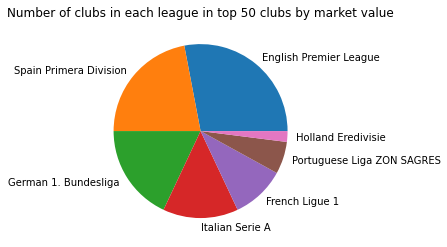

In [100]:

top_50_clubs =df_players.groupby('club_name')['value_eur'].sum().nlargest(50)


top_50_clubs_leagues = df_players.loc[df_players['club_name'].isin(top_50_clubs.index), ['club_name', 'league_name']].drop_duplicates()

# Count the number of clubs in each league
clubs_by_league = top_50_clubs_leagues['league_name'].value_counts()
print(clubs_by_league)

plt.pie(clubs_by_league.values, labels=clubs_by_league.index)
plt.title('Number of clubs in each league in top 50 highest market valued clubs')
plt.show()

**1.6** Filter the dateset for the 1000 most valueable players. Plot the minium, the mean, the 99%-quantile, and the overall player skill ("overall") for each  jersey number ('team_jersey_number') group (for jersey numbers from 1 to 15). (Replicate ``'overall.pdf'.``)

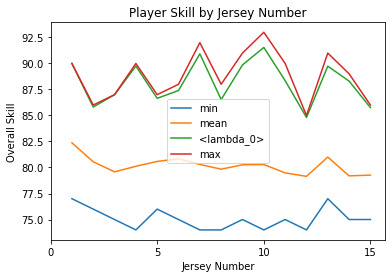

In [4]:
top_1000_players=df_players.nlargest(1000, 'value_eur')


df = top_1000_players[top_1000_players['team_jersey_number'].isin(range(1, 16))]

grouped_data = df.groupby('team_jersey_number')['overall'].agg(['min', 'mean', lambda x: x.quantile(0.99), 'max'])

# Plot
grouped_data.plot()
plt.xticks(range(0, 16, 5))
plt.xlabel('Jersey Number')
plt.ylabel('Overall Skill')
plt.title('Player Skill by Jersey Number')
plt.legend()
plt.show()

***1.7***  Print the the 3 most frequent jersey numbers ('team_jersey_number') for each team postion ('team_position'). Store your results in dataframe and sort the team postions by thier most frequent jersey number.

In [13]:
group_data = df_players.groupby(['team_position', 'team_jersey_number'])['sofifa_id'].count()
print(group_data)
most_3_frequent_jersey_per_position=group_data.groupby('team_position').nlargest(3)
print(most_3_frequent_jersey_per_position)


team_position  team_jersey_number
CAM            4.0                    1
               6.0                    3
               7.0                   19
               8.0                   22
               9.0                   11
                                     ..
SUB            95.0                   7
               96.0                  10
               97.0                   9
               98.0                  11
               99.0                  42
Name: sofifa_id, Length: 1213, dtype: int64
team_position  team_position  team_jersey_number
CAM            CAM            10.0                   72
                              11.0                   32
                              8.0                    22
CB             CB             4.0                    22
                              5.0                    19
                                                   ... 
ST             ST             10.0                   42
                              11.0       

***1.8*** Add lines of code in the following template to replicate ``'potential.pdf'``. Explain precisely the line where group_index is determined and why this determination is not computational efficient.

In [83]:
#Create a matrix filled with zeros and dimension 100x100
matrix=
limit_matrix=


for ov,pot in zip(df['overall'],df['potential']):
    # Increase the value in the matrix in ov row and the pot column by 1
        matrix[ov,pot]+=1

color_limits=[0,1,5,20,50,100]


# Iterate over ov grid

    # Iterate over pot grid

        group_index = [v for v,value in enumerate(color_limits) if value<=matrix[ov,pot]][-1]
        # Store the group index to limit matrix 


# Create the figure


# Save the figure
fig.write_image("potential.pdf")
fig

SyntaxError: invalid syntax (1461784348.py, line 2)

## 2. Regression

***2.1*** First delete all players where the value below the 25% quartile and then drop all players that are not playing for a national team ('nation_position').

In [41]:
quantile = df_players.value_eur.quantile(0.25)
df_players = df_players[df_players['value_eur']>=quantile]
df_players = df_players.dropna(subset=['nation_position'])


***2.2*** Regress the logarithmic player value on the overall strength ('overall') and potential ('potential') of the player.  

In [42]:
model_logPlayer=smf.ols('np.log(value_eur) ~ overall + potential',data=df_players).fit()
print(model_logPlayer.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(value_eur)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     7101.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:22:51   Log-Likelihood:                -207.94
No. Observations:                 895   AIC:                             421.9
Df Residuals:                     892   BIC:                             436.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4622      0.135     -3.422      0.0

***2.3*** Plot the residuals and logarithmic player value in scatter plot.

Text(0, 0.5, 'Predicted player values')

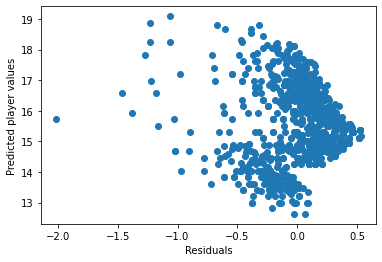

In [43]:
plt.scatter(model_logPlayer.resid, model_logPlayer.predict())
plt.xlabel('Residuals')
plt.ylabel('Predicted player values')

***2.4*** Create a single column for every postion in 'team_position', which is one if a player plays on that postion an zero in all other cases. Regress the logarithmic player value on age, the squared age, Body-Mass-Index and the team position dummies.  Hint: The BMI is ``weight / height**2``.

In [44]:
print(df_players.team_position.unique())
df_players = pd.get_dummies(df_players, columns=['team_position'])
df_players['BMI'] = df_players['weight_kg']/df_players['height_cm']*2
df_players['age2']=df_players['age']*2

['CAM' 'LS' 'GK' 'RCM' 'LCB' 'RW' 'SUB' 'LW' 'RDM' 'ST' 'RS' 'LCM' 'RB'
 'LB' 'RCB' 'RM' 'LM' 'CDM' 'CB' 'LDM' 'RES' 'RWB' 'RAM' 'LF' 'LWB' 'CM'
 'LAM']


In [45]:
res2=smf.ols('np.log(value_eur) ~ age+age2+BMI+team_position_CAM+team_position_LS+team_position_GK+team_position_RCM+team_position_LCB+team_position_RW+team_position_SUB+team_position_LW+team_position_RDM+team_position_ST+team_position_RS+team_position_LCM+team_position_RB+team_position_LB+team_position_RCB+team_position_RM+team_position_LM+team_position_CDM+team_position_CB+team_position_LDM+team_position_RES+team_position_RWB+team_position_RAM+team_position_LF+team_position_LWB+team_position_CM+team_position_LAM' ,data=df_players).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(value_eur)   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     3.145
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.13e-07
Time:                        02:23:58   Log-Likelihood:                -1430.4
No. Observations:                 895   AIC:                             2919.
Df Residuals:                     866   BIC:                             3058.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.5719      0.647     24.068      0.000      14.302      16.842
age                  -0.0106      0.002     -4.492      0.000      -0.015      -0.006
age2                 -0.0213      0.005     -4.492      0.000      -0.031      -0.012
BMI                   1.1526      0.773      1.491      0.136      -0.365       2.670
team_position_CAM     0.9112      0.262      3.472      0.001       0.396       1.426
team_position_LS      1.0331      0.290      3.567      0.000       0.465       1.602
team_position_GK      0.5512      0.166      3.322      0.001       0.226       0.877
team_position_RCM     0.8467      0.244      3.477      0.001       0.369       1.325
team_position_LCB     0.3183      0.189      1.688      0.092      -0.052       0.689
team_position_RW      1.0004      0.379      2.638      0.008       0.256       1.745
team_position_SUB     0.1722      0.111      1.551      0.121      -0.046       0.390
team_position_LW      1.1080      0.334      3.315      0.001       0.452       1.764
team_position_RDM     0.9730      0.274      3.545      0.000       0.434       1.512
team_position_ST      0.6582      0.196      3.352      0.001       0.273       1.044
team_position_RS      0.9933      0.284      3.500      0.000       0.436       1.550
team_position_LCM     0.8320      0.206      4.040      0.000       0.428       1.236
team_position_RB      0.3385      0.194      1.745      0.081      -0.042       0.719
team_position_LB      0.3385      0.220      1.540      0.124      -0.093       0.770
team_position_RCB     0.1662      0.199      0.836      0.403      -0.224       0.556
team_position_RM      0.8082      0.236      3.422      0.001       0.345       1.272
team_position_LM      0.5110      0.211      2.427      0.015       0.098       0.924
team_position_CDM     0.7657      0.336      2.279      0.023       0.106       1.425
team_position_CB      0.5795      0.352      1.645      0.100      -0.112       1.271
team_position_LDM     0.4613      0.268      1.723      0.085      -0.064       0.987
team_position_RES    -0.2308      0.223     -1.036      0.300      -0.668       0.206
team_position_RWB    -0.1192      0.530     -0.225      0.822      -1.160       0.922
team_position_RAM     1.1496      0.835      1.377      0.169      -0.489       2.788
team_position_LF      1.3988      1.175      1.191      0.234      -0.907       3.705
team_position_LWB     0.3914      0.450      0.870      0.385      -0.492       1.275
team_position_CM     -0.5651      0.485     -1.165      0.244      -1.517       0.387
team_position_LAM     0.1808      0.682      0.265      0.791      -1.158       1.520
==============================================================================
Omnibus:                       37.200   Durbin-Watson:                   0.171
P

***2.5*** Use the same model as in the last task. Now estimate all possible models in which you omit one explanatory variable (position dummies count as single explanatory variables). Which has the highest and lowest influence on the R Squared? (Use a loop!)

In [46]:
r2_dict={}




print(pd.Series(r2_dict).sort_values())

Series([], dtype: float64)


C:\Users\USER\AppData\Local\Temp\ipykernel_19924\3435261245.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  print(pd.Series(r2_dict).sort_values())


## 3. Webscraping

Create a Python program that scrapes the Wikipedia articles for all US presidents and extracts specific information from each page. Start by accessing the URL 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States'. Then, use this page to generate a CSV file named ``'US_presidents.csv'``. This file should contain one row for each US president and include their name, the years the president was elected, the url of the president's personal Wikipedia page, and a column named 'texts' that contains the text from all paragraph elements (p tags) on their Wikipedia page. Use the regular expression ``re.split('\W',text)`` to count the number of words in each 'texts' column and store it in the dataframe. (Only for practice: Query the start and the end year of the presidencies and store them into sperate columns.)

In [31]:

response = requests.get('https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States')
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'wikitable'})
# print(table)
presidents_list = []

# Looping through each row in the table 
for r in table.find_all('tr')[1:]:
    columns = r.find_all('td')
    name = columns[1].text.strip()
    election_years = columns[2].text.strip()
    link = columns[1].find('a')['href']
     
    president_url = f'https://en.wikipedia.org{link}'
    
    # extract the text 
    president_response = requests.get(president_url)
    president_soup = BeautifulSoup(president_response.content, 'html.parser')
    paragraphs = president_soup.find_all('p')
    texts = ' '.join([p.text.strip() for p in paragraphs])
    
   
    n_words = len(re.split('\W', texts))
    
   
    # Extracting the start and end years of the presidency
    years = re.findall(r'\d{4}', election_years)
    #print(election_years)
    start = years[0].strip()[:4] if years[0].strip() != 'Incumbent' else ''
    end = years[-1].strip()[-4:] if years[-1].strip() != 'Incumbent' else ''

   
    # dictionary of president 
    president_dict = {
        'name': name, 'election_years': election_years, 'link': president_url, 'start': start, 'end': end, 'texts': texts, 'n_words': n_words
    }
    
    
    presidents_list.append(president_dict)


presidents_df = pd.DataFrame(presidents_list)

# Saving the DataFrame as a CSV file
presidents_df.to_csv('~/Desktop/US_presidents.csv', index=False)
print(presidents_df)

                                     name  \
0        George Washington(1732–1799)[17]   
1               John Adams(1735–1826)[19]   
2         Thomas Jefferson(1743–1826)[21]   
3            James Madison(1751–1836)[22]   
4             James Monroe(1758–1831)[24]   
5        John Quincy Adams(1767–1848)[25]   
6           Andrew Jackson(1767–1845)[28]   
7         Martin Van Buren(1782–1862)[29]   
8   William Henry Harrison(1773–1841)[30]   
9               John Tyler(1790–1862)[31]   
10           James K. Polk(1795–1849)[34]   
11          Zachary Taylor(1784–1850)[35]   
12        Millard Fillmore(1800–1874)[36]   
13         Franklin Pierce(1804–1869)[38]   
14          James Buchanan(1791–1868)[39]   
15         Abraham Lincoln(1809–1865)[40]   
16          Andrew Johnson(1808–1875)[42]   
17        Ulysses S. Grant(1822–1885)[43]   
18     Rutherford B. Hayes(1822–1893)[44]   
19       James A. Garfield(1831–1881)[45]   
20       Chester A. Arthur(1829–1886)[46]   
21        

## 4.  US Presidents

**4.1** Open ``US_presidents.csv`` as dataframe. Write a Python code that filters the given DataFrame to extract the information of the nine US presidents who had not won a presidential election before assuming office. 


In [69]:
df_presidents = pd.read_csv ('D:/Dort data science/Python block course/Final assignment/US_presidents.csv')

presidents_not_won = df_presidents[df_presidents['election_years'].isna() ]

print(presidents_not_won)


    Unnamed: 0                                             link  \
9            9         https://en.wikipedia.org/wiki/John_Tyler   
12          12   https://en.wikipedia.org/wiki/Millard_Fillmore   
16          16     https://en.wikipedia.org/wiki/Andrew_Johnson   
20          20  https://en.wikipedia.org/wiki/Chester_A._Arthur   
37          37        https://en.wikipedia.org/wiki/Gerald_Ford   

                 name election_years  start     end  n_words  \
9          John Tyler            NaN   1841  1845.0    15788   
12   Millard Fillmore            NaN   1850  1853.0    12396   
16     Andrew Johnson            NaN   1865  1869.0    16431   
20  Chester A. Arthur            NaN   1881  1885.0    11912   
37        Gerald Ford            NaN   1974  1977.0    13594   

                                                texts  
9   ['', "John Tyler (March 29, 1790 – January 18,...  
12  ['', 'Millard Fillmore (January 7, 1800 – Marc...  
16  ['', 'Andrew Johnson (December 29, 1808 

**4.2** Create a bar plot that shows the number of words in the Wikipedia article for each US president. So you should replicate the same bar plot as shown in ``n_words.pdf``.
(Hints: You should take care of the fact that Grover Cleveland served non-consecutive terms. Adjust the font size of the plot to make it more readable.)

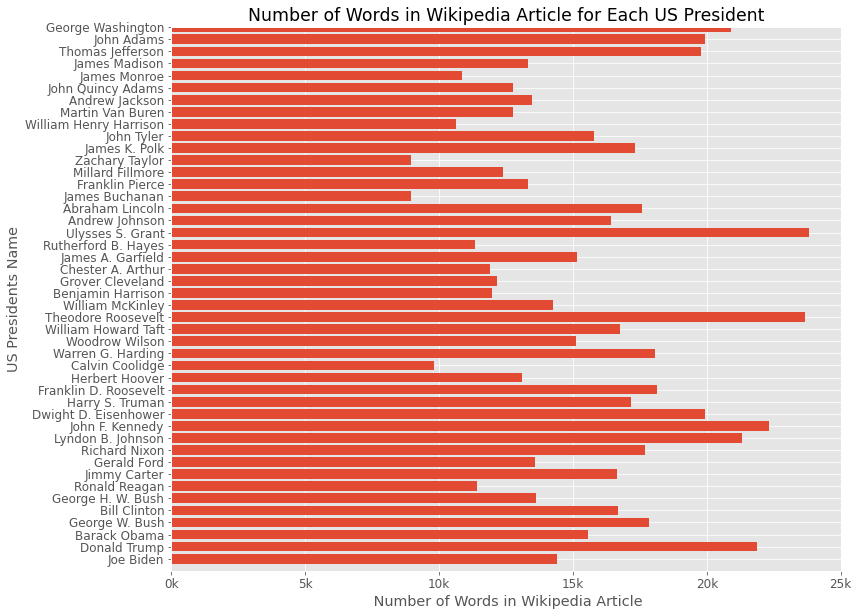

In [52]:
us_presidents = pd.read_csv('D:/Dort data science/Python block course/Final assignment/US_presidents.csv', usecols=['name', 'n_words'])


plt.figure(figsize=(12, 10))
plt.rcParams.update({'font.size': 12})

# Create a bar plot 
plt.barh(us_presidents['name'], us_presidents['n_words']/1000)

def format_ticks(x, pos):
    return '{:,.0f}k'.format(x)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().set_ylim([45, 0])

plt.xlabel(' Number of Words in Wikipedia Article')
plt.ylabel('US Presidents Name')
plt.title('Number of Words in Wikipedia Article for Each US President')
plt.show()

**4.3** Add a new column to a given DataFrame that contains the number of years each US president served in office. Then, create a bar plot that shows the length of each presidency in chronological order, as given in the file ``office_terms.pdf``. Make sure to label the x-axis and y-axis appropriately for clarity. (Hint: Set the width to 2000 and the height to 400.) "

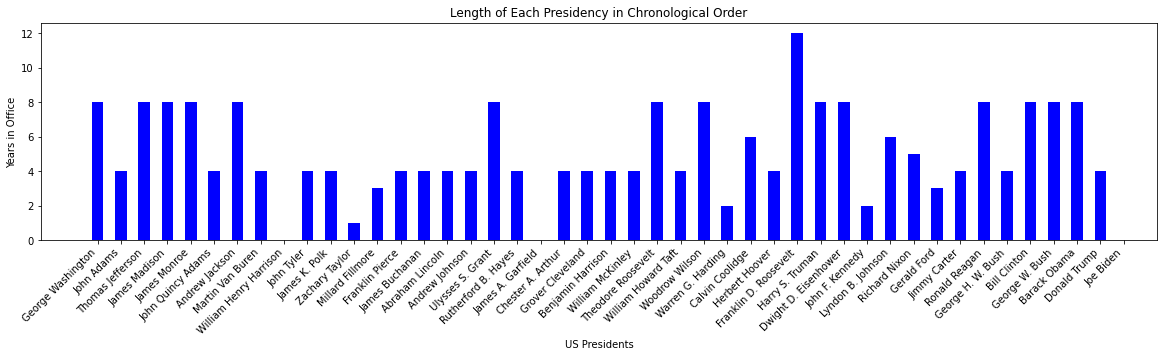

In [79]:
df_presidents['serving_years'] = (df_presidents['end'] - df_presidents['start']) 

# Create a bar plot
plt.figure(figsize=(20, 4))
plt.bar(df_presidents['name'], df_presidents['serving_years'], width=0.5, color='blue')

# Set the x-axis and y-axis labels
plt.xlabel('US Presidents')
plt.ylabel('Years in Office')
plt.title('Length of Each Presidency in Chronological Order')

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



**4.4** Add a new column to a given DataFrame for each US president that stores the count of how many times the last name of that president appears in the Wikipedia articles of the other presidents. Then, use the ``px.imshow`` function to create a heatmap plot that replicates the same visualization as shown in ``occurrence.pdf``. The heatmap should show only the 20 most recent presidents and the count should be reduced to a maximum value of 100 to improve readability. 

In [77]:
df_presidents = pd.read_csv('D:/Dort data science/Python block course/Final assignment/US_presidents.csv')

last_name_counts = {}


for i, president in df_presidents.iterrows():
    last_name = president['name'].split()[-1]
    count = 0
    
    for j, other in df_presidents.iterrows():
        if i != j:
            count += other['texts'].count(last_name)
    last_name_counts[president['name']] = count

# Add new column to the DataFrame
df_presidents['last_name_count'] = [last_name_counts[name] for name in df_presidents['name']]

print(df_presidents)


    Unnamed: 0                                               link  \
0            0    https://en.wikipedia.org/wiki/George_Washington   
1            1           https://en.wikipedia.org/wiki/John_Adams   
2            2     https://en.wikipedia.org/wiki/Thomas_Jefferson   
3            3        https://en.wikipedia.org/wiki/James_Madison   
4            4         https://en.wikipedia.org/wiki/James_Monroe   
5            5    https://en.wikipedia.org/wiki/John_Quincy_Adams   
6            6       https://en.wikipedia.org/wiki/Andrew_Jackson   
7            7     https://en.wikipedia.org/wiki/Martin_Van_Buren   
8            8  https://en.wikipedia.org/wiki/William_Henry_Ha...   
9            9           https://en.wikipedia.org/wiki/John_Tyler   
10          10        https://en.wikipedia.org/wiki/James_K._Polk   
11          11       https://en.wikipedia.org/wiki/Zachary_Taylor   
12          12     https://en.wikipedia.org/wiki/Millard_Fillmore   
13          13      https://en.wik

In [97]:

df_presidents = df_presidents.sort_values('start', ascending=False).head(20)

